In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
df = pd.read_csv(r"..data\processed_data\bank_of_canada_feature_engineered.csv")

In [4]:
df.head()

,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Jun-25_MoM_change,Jul-25_MoM_change,Aug-25_MoM_change,Sep-25_MoM_change,Jun-25_MoM_pct_change,Jul-25_MoM_pct_change,Aug-25_MoM_pct_change,Sep-25_MoM_pct_change,avg_credit,max_credit,min_credit,credit_range,credit_trend,credit_std_dev,Credit_Type_Consumer credit,Credit_Type_Household credit,Credit_Type_Residential mortgage credit,Credit_Type_Total business and household credit
0,1.000000,1.000000,1.000000,1.000000,1.000000,-6821.0,-5190.0,-1516.0,18385.0,-0.147427,-0.112341,-0.032852,0.398534,4621187.8,4631546.0,4613161.0,18385.0,4858.0,7843.931648,False,False,False,True
1,0.417323,0.419131,0.421199,0.423538,0.425432,2503.0,6350.0,9152.0,16784.0,0.109149,0.276603,0.397558,0.726200,2306033.0,2327992.0,2293203.0,34789.0,34789.0,14107.184907,False,True,False,False
2,0.262027,0.264505,0.266240,0.268295,0.270199,5739.0,5894.0,8375.0,14348.0,0.343389,0.351457,0.497649,0.848348,1685627.2,1705636.0,1671280.0,34356.0,34356.0,13413.676517,False,False,True,False
3,0.000000,0.000000,0.000000,0.000000,0.000000,-3236.0,456.0,777.0,2436.0,-0.520322,0.073704,0.125496,0.392954,620405.8,622356.0,618687.0,3669.0,433.0,1650.008697,True,False,False,False
4,0.427382,0.426243,0.423843,0.421220,0.419336,-9324.0,-11539.0,-10670.0,1601.0,-0.399574,-0.496480,-0.461381,0.069550,2315155.6,2333486.0,2301953.0,31533.0,-29932.0,13531.801776,False,False,False,False


In [5]:
df.shape

(5, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   May-25                                           5 non-null      float64
 1   Jun-25                                           5 non-null      float64
 2   Jul-25                                           5 non-null      float64
 3   Aug-25                                           5 non-null      float64
 4   Sep-25                                           5 non-null      float64
 5   Jun-25_MoM_change                                5 non-null      float64
 6   Jul-25_MoM_change                                5 non-null      float64
 7   Aug-25_MoM_change                                5 non-null      float64
 8   Sep-25_MoM_change                                5 non-null      float64
 9   Jun-25_MoM_pct_change               

In [ ]:
df.drop(columns=['Credit Type'], inplace=True, errors='ignore')

In [8]:
df.isnull().sum()

May-25                                             0
Jun-25                                             0
Jul-25                                             0
Aug-25                                             0
Sep-25                                             0
Jun-25_MoM_change                                  0
Jul-25_MoM_change                                  0
Aug-25_MoM_change                                  0
Sep-25_MoM_change                                  0
Jun-25_MoM_pct_change                              0
Jul-25_MoM_pct_change                              0
Aug-25_MoM_pct_change                              0
Sep-25_MoM_pct_change                              0
avg_credit                                         0
max_credit                                         0
min_credit                                         0
credit_range                                       0
credit_trend                                       0
credit_std_dev                                

In [9]:
df.describe()

,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Jun-25_MoM_change,Jul-25_MoM_change,Aug-25_MoM_change,Sep-25_MoM_change,Jun-25_MoM_pct_change,Jul-25_MoM_pct_change,Aug-25_MoM_pct_change,Sep-25_MoM_pct_change,avg_credit,max_credit,min_credit,credit_range,credit_trend,credit_std_dev
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000
mean,0.421346,0.421976,0.422256,0.422611,0.422993,-2227.80000,-805.800000,1223.600000,10710.800000,-0.122957,0.018589,0.105294,0.487117,2.309682e+06,2.324203e+06,2.299657e+06,24546.400000,8900.800000,10109.320709
std,0.366677,0.366401,0.366208,0.365990,0.365796,6291.27131,7617.541021,8111.174841,8069.496558,0.355797,0.340165,0.380780,0.307703,1.465111e+06,1.466530e+06,1.463973e+06,13451.583245,26991.666912,5369.055071
min,0.000000,0.000000,0.000000,0.000000,0.000000,-9324.00000,-11539.000000,-10670.000000,1601.000000,-0.520322,-0.496480,-0.461381,0.069550,6.204058e+05,6.223560e+05,6.186870e+05,3669.000000,-29932.000000,1650.008697
25%,0.262027,0.264505,0.266240,0.268295,0.270199,-6821.00000,-5190.000000,-1516.000000,2436.000000,-0.399574,-0.112341,-0.032852,0.392954,1.685627e+06,1.705636e+06,1.671280e+06,18385.000000,433.000000,7843.931648
50%,0.417323,0.419131,0.421199,0.421220,0.419336,-3236.00000,456.000000,777.000000,14348.000000,-0.147427,0.073704,0.125496,0.398534,2.306033e+06,2.327992e+06,2.293203e+06,31533.000000,4858.000000,13413.676517
75%,0.427382,0.426243,0.423843,0.423538,0.425432,2503.00000,5894.000000,8375.000000,16784.000000,0.109149,0.276603,0.397558,0.726200,2.315156e+06,2.333486e+06,2.301953e+06,34356.000000,34356.000000,13531.801776
max,1.000000,1.000000,1.000000,1.000000,1.000000,5739.00000,6350.000000,9152.000000,18385.000000,0.343389,0.351457,0.497649,0.848348,4.621188e+06,4.631546e+06,4.613161e+06,34789.000000,34789.000000,14107.184907


# DEFINING THE TARGET VARIABLE (CREDIT RISK)

In [ ]:
df.columns

Index(['May-25', 'Jun-25', 'Jul-25', 'Aug-25', 'Sep-25', 'Jun-25_MoM_change',
       'Jul-25_MoM_change', 'Aug-25_MoM_change', 'Sep-25_MoM_change',
       'Jun-25_MoM_pct_change', 'Jul-25_MoM_pct_change',
       'Aug-25_MoM_pct_change', 'Sep-25_MoM_pct_change', 'avg_credit',
       'max_credit', 'min_credit', 'credit_range', 'credit_trend',
       'credit_std_dev', 'Credit_Type_Consumer credit',
       'Credit_Type_Household credit',
       'Credit_Type_Residential mortgage credit',
       'Credit_Type_Total business and household credit'],
      dtype='object')

In [ ]:
df['risk_score'] = (
    0.5 * df['credit_std_dev'] +
    0.3 * abs(df['credit_trend']) +
    0.2 * abs(df['Sep-25_MoM_pct_change'])
)

In [ ]:
df['risk_score'].describe()

count        5.000000
mean     11316.837778
std       7628.935826
min        954.982939
25%       5379.445531
50%      15745.514798
75%      17013.807928
max      17490.437694
Name: risk_score, dtype: float64

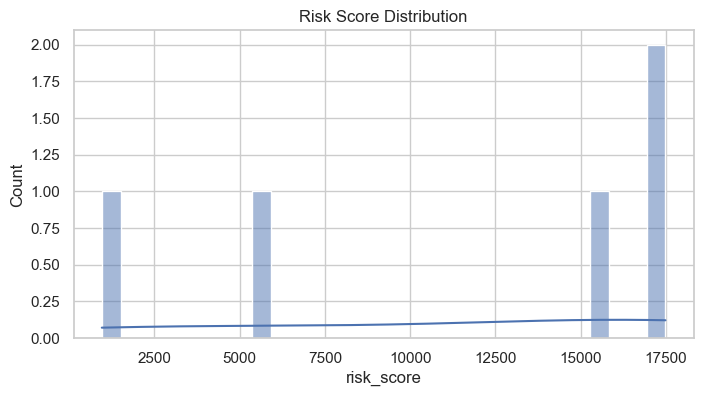

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['risk_score'], bins=30, kde=True)
plt.title('Risk Score Distribution')
plt.show()

In [ ]:
df['credit_risk'] = pd.qcut(
    df['risk_score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

In [ ]:
df['credit_risk'].value_counts()

credit_risk
Low       2
High      2
Medium    1
Name: count, dtype: int64

In [ ]:
df[['risk_score', 'credit_risk']].head(10)

,risk_score,credit_risk
0,5379.445531,Low
1,17490.437694,High
2,17013.807928,High
3,954.982939,Low
4,15745.514798,Medium


# FEATURE–TARGET SPLIT & MODEL TRAINING

In [17]:
X = df.drop(columns=['credit_risk', 'risk_score'])
y = df['credit_risk']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# View encoding
dict(zip(le.classes_, le.transform(le.classes_)))

{'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [ ]:
df['credit_risk'].value_counts()

credit_risk
Low       2
High      2
Medium    1
Name: count, dtype: int64

# Reduce to Binary Classification For small macro datasets

In [ ]:
df['credit_risk_binary'] = df['credit_risk'].replace({
    'Medium': 'High',
    'High': 'High'
})

C:\Users\kirti\AppData\Local\Temp\ipykernel_6244\218815244.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['credit_risk_binary'] = df['credit_risk'].replace({


In [ ]:
df['credit_risk_binary'].value_counts()

credit_risk_binary
High    3
Low     2
Name: count, dtype: int64

In [ ]:
X = df.drop(columns=['credit_risk', 'credit_risk_binary', 'risk_score'])
y = df['credit_risk_binary']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

As the dataset is very small. For small macroeconomic datasets, you should NOT use a train/test split.

# Use Stratified K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
skf = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)

log_model = LogisticRegression(max_iter=1000)

In [ ]:
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    log_model.fit(X_train, y_train)
    y_pred = log_model.predict(X_test)

    print(f"\nFold {fold}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

c:\Users\kirti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\kirti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kirti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kirti\AppData\Local\Programs\Python\Python311\Lib\site-pack


Fold 1
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Fold 2
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Fold 3


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

Explicit Labels Parameter - explicitly telling sklearn which labels exist.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

labels = np.unique(y_encoded)  # all possible labels

In [ ]:
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    log_model.fit(X_train, y_train)
    y_pred = log_model.predict(X_test)

    print(f"\nFold {fold}")
    print(
        classification_report(
            y_test,
            y_pred,
            labels=labels,
            target_names=le.classes_,
            zero_division=0
        )
    )

c:\Users\kirti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(



Fold 1
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Fold 2
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Fold 3
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.00      0.00      0.00         0

    accuracy                           1.00         1
   macro avg       0.50      0.50      0.50         1
weighted avg       1.00      1.00      1.00       

In [ ]:
df.to_csv(r"..data\processed_data\bank_of_canada_feature_engineered.csv", index=False)

In [ ]:
import joblib

# Save trained model
joblib.dump(log_model, r"..models\credit_risk_model.pkl")

# Save label encoder
joblib.dump(le, r"..models\label_encoder.pkl")

In [ ]:
import joblib

joblib.dump(X.columns.tolist(), r"..models\feature_names.pkl")